In [1]:
import numpy as np
import matplotlib.pyplot as plt

from abtem.ionization import SubshellTransitions, TransitionPotential, EELSDetector
from abtem import SMatrix, Potential, GridScan
from ase import units
from ase.io import read


In [2]:
Z = 14 # atomic number
n = 1 # principal quantum number
l = 0 # azimuthal quantum number
xc = 'PBE' # exchange-correlation functional

O_transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=10,order=2)

print('bound electron configuration:', O_transitions.bound_configuration)
print('ionic electron configuration:', O_transitions.excited_configuration)



bound electron configuration: 1s2 2s2 2p6 3s2 3p2
ionic electron configuration: 1s1 2s2 2p6 3s2 3p2


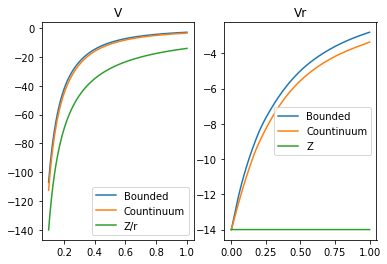

In [3]:

r = np.linspace(0.1,1, 10000)
plt.subplot(121)
vr_bound = O_transitions.get_bounded_potential()
vr=O_transitions.get_continuum_potential()
plt.plot(r,vr_bound(r)/r,label='Bounded')
plt.plot(r,vr(r)/r,label='Countinuum')
plt.plot(r,-14/r,label='Z/r')
plt.title('V')
plt.legend()

plt.subplot(122)
r = np.linspace(0,1, 10000)
vr_bound = O_transitions.get_bounded_potential()
vr=O_transitions.get_continuum_potential()
plt.plot(r,vr_bound(r),label='Bounded')
plt.plot(r,vr(r),label='Countinuum')
plt.plot(r,-14*np.ones(r.size),label='Z')

plt.legend()
plt.title('Vr')
# plt.plot(r,2)
plt.savefig('Vr_Si.jpg')

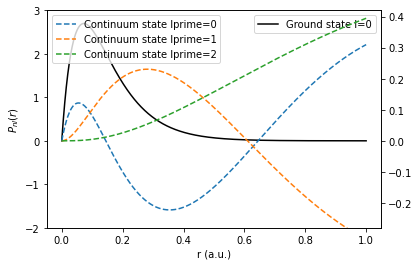

In [4]:
rmax=1
r = np.linspace(0, rmax, 10000)

from ase import units
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(r,O_transitions.get_bound_wave()(r),'k-',label='Ground state l=0')
ylim = [-2,3]
ax.set_ylim(ylim)
ax.set_xlabel("r (a.u.)")
ax.set_ylabel("$P_{nl}(r)$")
plt.legend()

ax2 = ax.twinx()
ylim = [-0.28, 0.42]
ax2.set_ylim(ylim)
for i in range(3):
    x = O_transitions.get_continuum_waves()[i](r)
    # y = O_transitions.get_continuum_waves()[1](r)
    ax2.plot(r,x,'--',label='Continuum state lprime='+str(i))

# ax.plot(r,np.sin(O_transitions.kc*r),label='Asymptotic sin wave')
# plt.xlabel('Distance (Bohr radius)')
# plt.ylabel('Raidal wave function')
plt.legend()
plt.savefig('Si_10eV_corrected.jpg')
# plt.show()

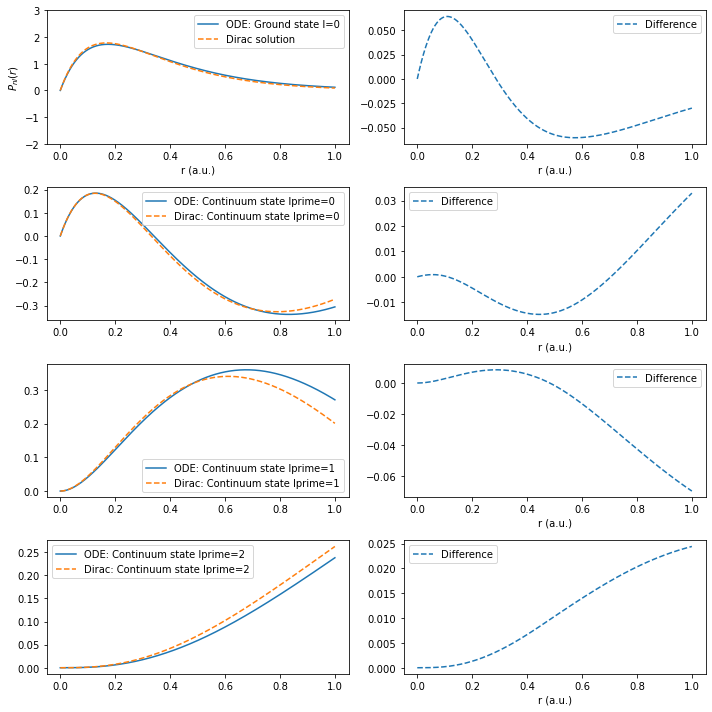

In [5]:
import pyms
from pyms.Ionization import orbital,transition_potential
from abtem.ionization import SubshellTransitions
import numpy as np
import matplotlib.pyplot as plt

bound_config = "1s2 2s2 2p6 3s2 3p2"
excited_config = "1s1 2s2 2p6 3s2 3p2"
# principal and orbital angular momentum quantum numbers for bound state
Z=6
n=1
l=0
# lprime = 0
epsilon = 10

Si_transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=epsilon,order=2)
SiK = orbital(Z,bound_config,n,l)

# Ionization energy (above ionization threshhold energy)

#angular momentum quantum number for ionized state
# 
# SiFree = orbital(Z,excited_config,0,lprime,epsilon=epsilon)

rmax = 1
r = np.linspace(0, rmax, 10000)

#Plot the radial component of the wave function
# SiK.plot(show=False)
# SiFree.plot(show=False)
fig, ax = plt.subplots(4,2,figsize=(10,10))
ax[0,0].plot(r,Si_transitions.get_bound_wave()(r),'-',label='ODE: Ground state l=0')
ax[0,0].plot(r,SiK(r),'--',label='Dirac solution')

ylim = [-2,3]
ax[0,0].set_ylim(ylim)
ax[0,0].set_xlabel("r (a.u.)")
ax[0,0].set_ylabel("$P_{nl}(r)$")
ax[0,0].legend()

ax[0,1].plot(r,SiK(r)-Si_transitions.get_bound_wave()(r),'--',label='Difference')
ax[0,1].set_xlabel("r (a.u.)")
ax[0,1].legend()
plt.tight_layout()

for i in range(3):
    x = Si_transitions.get_continuum_waves()[i](r)
    # y = O_transitions.get_continuum_waves()[1](r)
    SiFree = orbital(Z,excited_config,0,i,epsilon=epsilon)
    ax[i+1,0].plot(r,x,'-',label='ODE: Continuum state lprime='+str(i))
    ax[i+1,0].plot(r,SiFree(r),'--',label='Dirac: Continuum state lprime='+str(i))
    ax[i+1,0].legend()
    ax[i+1,1].plot(r,SiFree(r)-x,'--',label='Difference')
    ax[i+1,1].set_xlabel("r (a.u.)")
    ax[i+1,1].legend()
    plt.tight_layout()





/var/folders/qd/j3g9kl897b51dksjn1hhw_4c0000gn/T/ipykernel_74377/1263993436.py:48: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot("311", projection="3d")
/var/folders/qd/j3g9kl897b51dksjn1hhw_4c0000gn/T/ipykernel_74377/1263993436.py:74: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot("312", projection="3d")
/var/folders/qd/j3g9kl897b51dksjn1hhw_4c0000gn/T/ipykernel_74377/1263993436.py:96: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot("313", projection="3d")


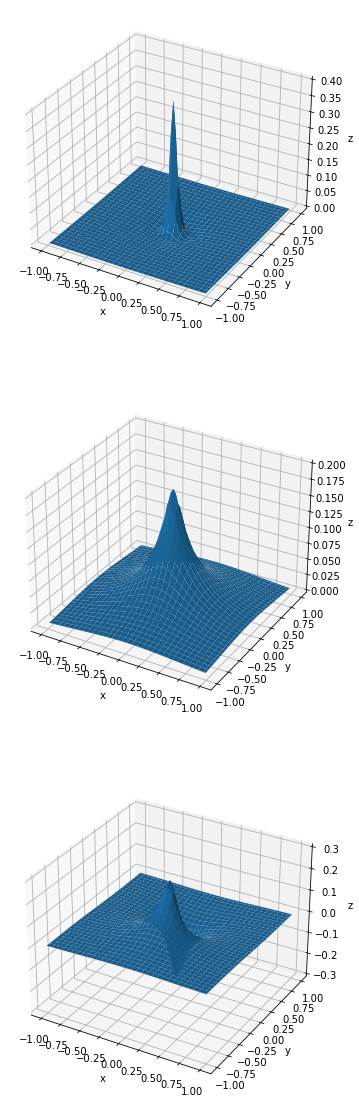

In [5]:
import pyms
import numpy as np
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D  # noqa

Z = 14
n = 1
ell = 0
epsilon = 10

ncols = 1
gsize = 256
gridshape = [gsize, gsize]
desired_gridshape = [gsize // 4, gsize // 4]
eV = 1e5
gridsize = [8, 8]
grid = np.linspace(0.0, 1.0)
bound = pyms.orbital(Z, bound_config, n, ell)
sigma = pyms.interaction_constant(eV)

X = pyms.utils.crop(
    np.broadcast_to(
        np.linspace(-gridsize[1] / 2, gridsize[1] / 2, num=gsize).reshape(
            (1, gsize)
        ),
        gridshape,
    ),
    desired_gridshape,
)

Y = pyms.utils.crop(
    np.broadcast_to(
        np.linspace(-gridsize[0] / 2, gridsize[0] / 2, num=gsize).reshape(
            (gsize, 1)
        ),
        gridshape,
    ),
    desired_gridshape,
)
lprime = 0
mlprime = 0

ZZ = 14
ncols = 3
fig = plt.figure(figsize=(4, 4 * ncols))
ax = fig.add_subplot("311", projection="3d")
lprime = 0
excited = pyms.orbital(ZZ, excited_config, 0, lprime, epsilon)
Z = (
    pyms.utils.crop(
        np.fft.fftshift(
            np.real(
                pyms.transition_potential(
                    bound, excited, gridshape, gridsize, 0, mlprime, eV
                )
            )
        ),
        desired_gridshape,
    )
    / sigma
)
# fig2,ax2 = plt.subplots()
# ax2.imshow(Z)
# plt.show(block=True)

ax.plot_surface(X, Y, Z)
ax.set_xlabel("x")
ax.set_zlim([0.00, 0.40])
ax.set_ylabel("y")
ax.set_zlabel("z")

ax = fig.add_subplot("312", projection="3d")
lprime = 1
excited = pyms.orbital(ZZ, excited_config, 0, lprime, epsilon)
mlprime = 0
Z = (
    pyms.utils.crop(
        np.fft.fftshift(
            np.imag(
                pyms.transition_potential(
                    bound, excited, gridshape, gridsize, 0, mlprime, eV
                )
            )
        ),
        desired_gridshape,
    )
    / sigma
)
ax.plot_surface(X, Y, Z)
ax.set_xlabel("x")
ax.set_zlim([0.00, 0.20])
ax.set_ylabel("y")
ax.set_zlabel("z")
ax = fig.add_subplot("313", projection="3d")
mlprime = 1
Z = (
    pyms.utils.crop(
        np.fft.fftshift(
            np.real(
                pyms.transition_potential(
                    bound, excited, gridshape, gridsize, 0, mlprime, eV
                )
            )
        ),
        desired_gridshape,
    )
    / sigma
)
ax.plot_surface(X, Y, Z)
ax.set_xlabel("x")
ax.set_zlim([-0.30, 0.30])
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show(block=True)
fig.savefig("pyms_Dwyer_Fig2_replication.pdf")

(l, ml) = (0, 0) -> (0, 0)
(l, ml) = (0, 0) -> (1, -1)
(l, ml) = (0, 0) -> (1, 0)
(l, ml) = (0, 0) -> (1, 1)


Transitions: 100%|██████████| 4/4 [00:13<00:00,  3.34s/it]
/Users/Zezhong/Dropbox/Computation/Python/abTEM/abtem/ionization/transitions.py:526: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(kt/self.kn)


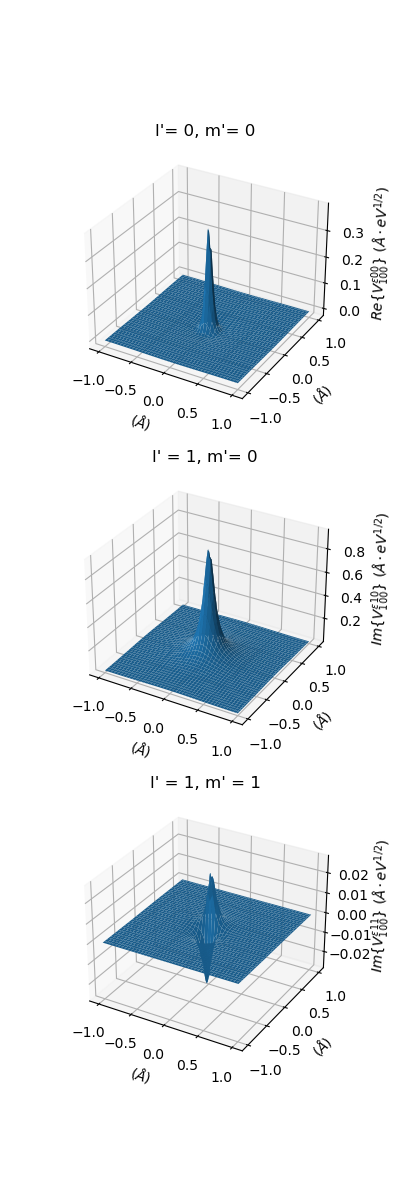

In [1]:
%matplotlib widget
from abtem.ionization import SubshellTransitions
import numpy as np
import matplotlib.pyplot as plt
import pyms
# %matplotlib widget

bound_config = "1s2 2s2 2p6 3s2 3p2"
excited_config = "1s1 2s2 2p6 3s2 3p2"
# principal and orbital angular momentum quantum numbers for bound state
Z=14
n=1
l=0
lprime = 0
epsilon = 10
energy = 100e3
extent = 2
gpts = 256
sampling = extent/gpts
grid = np.linspace(-extent/2,extent/2,gpts)
X, Y = np.meshgrid(grid, grid)
sigma = pyms.interaction_constant(energy)


Si_transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=epsilon,order=1)

for bound_state, continuum_state in Si_transitions.get_transition_quantum_numbers():
    print(f'(l, ml) = {bound_state} -> {continuum_state}')
    
atomic_transition_potentials = Si_transitions.get_transition_potentials(extent = extent,
                                                                       gpts = gpts,
                                                                       energy = energy,dirac=False)

# fig, axes = plt.subplots(3,1, figsize = (20,20))
# for atomic_transition_potential in atomic_transition_potentials:
    # bound_state, continuum_state = Si_transitions.get_transition_quantum_numbers()
ncols = 3
fig = plt.figure(figsize=(4, 4 * ncols))
ax = fig.add_subplot(311, projection="3d")
arr = np.real(atomic_transition_potentials[0].measure().array)
arr = arr/sigma
ax.plot_surface(X, Y, arr)
ax.set_title('l\'= 0, m\'= 0')
plt.xlabel(r'($\AA$)')
plt.ylabel(r'($\AA$)')
ax.set_zlabel(r'$Re\{V_{100}^{\epsilon00}\}$ ($\AA \cdot eV^{1/2}$)')


# fig = plt.figure(figsize=(4, 4 * ncols))
ax = fig.add_subplot(312, projection="3d")
arr = np.imag(atomic_transition_potentials[2].measure().array)
arr = arr/sigma
ax.plot_surface(X, Y, arr)
ax.set_title('l\' = 1, m\'= 0')
plt.xlabel(r'($\AA$)')
plt.ylabel(r'($\AA$)')
ax.set_zlabel(r'$Im\{V_{100}^{\epsilon10}\}$ ($\AA \cdot eV^{1/2}$)')


# fig = plt.figure(figsize=(4, 4 * ncols))
ax = fig.add_subplot(313, projection="3d")
arr = np.imag(atomic_transition_potentials[3].measure().array)
arr = arr/sigma
ax.plot_surface(X, Y, arr)
ax.set_title('l\' = 1, m\' = 1')
plt.xlabel(r'($\AA$)')
plt.ylabel(r'($\AA$)')
ax.set_zlabel(r'$Im\{V_{100}^{\epsilon11}\}$ ($\AA \cdot eV^{1/2}$)')

fig.savefig("Abtem_Dwyer_Fig2_replication.pdf", dpi=300)
    # ax.title(f'(lprime,mprime)={continuum_state}')


    # ax.plot_surface(X, Y, Z)
    # ax.set_xlabel("x")
    # ax.set_zlim([0.00, 0.40])
    # ax.set_ylabel("y")
    # ax.set_zlabel("z")



In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1,3)
Z=14
n=1
l=0
lprime = 0
epsilon = 10
energy = 100e3
extent = 2
gpts = 256
sampling = extent/gpts
grid = np.linspace(-extent/2,extent/2,gpts)
X, Y = np.meshgrid(grid, grid)
sigma = pyms.interaction_constant(energy)
Si_transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=epsilon,order=1)
atomic_transition_potentials = Si_transitions.get_transition_potentials(extent = extent,
                                                                       gpts = gpts,
                                                                       energy = energy,dirac=True)
fig = plt.figure()
arr = np.real(atomic_transition_potentials[0].measure().array)
arr = arr/sigma
# ax.plot_surface(X, Y, arr)
ax[0].imshow(arr)


n = 1
ell = 0
lprime = 0
mlprime = 0 
epsilon = 10

gridshape = [gpts, gpts]
desired_gridshape = [gpts, gpts]
gridsize = [extent, extent]
bound = pyms.orbital(Z, bound_config, n, ell)
excited = pyms.orbital(Z, excited_config, 0, lprime, epsilon)
Z = (
        np.fft.fftshift(
            np.real(
                pyms.transition_potential(
                    bound, excited, gridshape, gridsize, 0, mlprime, energy
                )
            )
        )/ sigma
)
ax[1].imshow(Z)
im = ax[2].imshow((arr-Z))

divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im,cax=cax)

/var/folders/qd/j3g9kl897b51dksjn1hhw_4c0000gn/T/ipykernel_74377/3538187789.py:9: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im1)


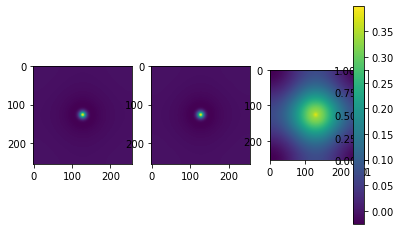

In [56]:
fig, ax = plt.subplots(1,3)
im0=ax[0].imshow(arr)
# plt.colorbar(im0)
im1=ax[1].imshow(Z)
# plt.colorbar(im1)
im2 = ax[2].imshow((arr-Z))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1)


/var/folders/qd/j3g9kl897b51dksjn1hhw_4c0000gn/T/ipykernel_74377/936534343.py:13: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


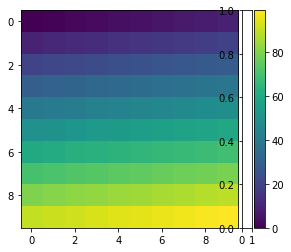

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

ax = plt.subplot()
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

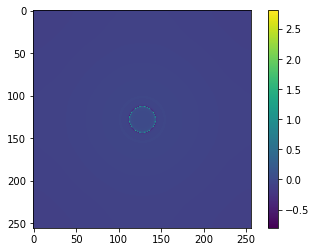

In [26]:
plt.imshow((arr-Z)/Z)
plt.colorbar()

In [7]:
# O_transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=100)
# atomic_transition_potentials = O_transitions.get_transition_potentials(extent = 5,
#                                                                        gpts = 256,
#                                                                        energy = 100e3)
                                                                       

In [12]:
from scipy import integrate

f = lambda x: x**8

integrate.quadrature(f, 0.0, 1.0)

(0.11111111111111106, 4.163336342344337e-17)

Transitions: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


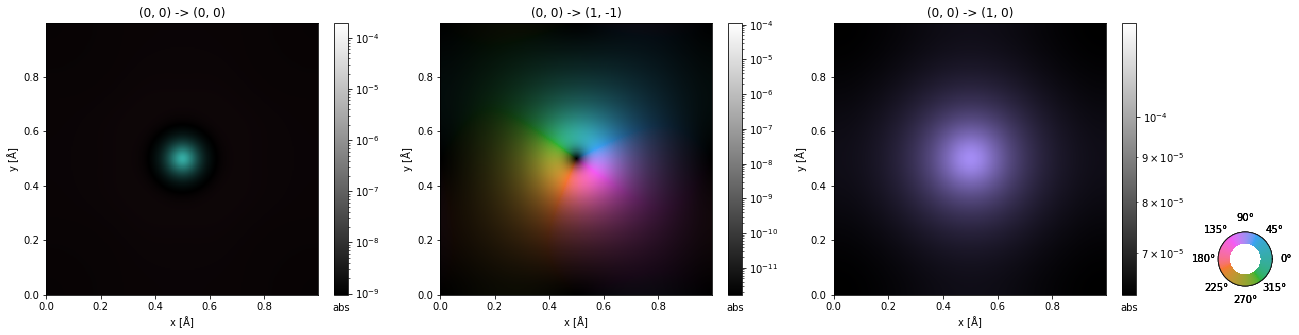

In [16]:
O_transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=1)
atomic_transition_potentials = O_transitions.get_transition_potentials(extent = 1,
                                                                       gpts = 256,
                                                                       energy = 100e3)

fig, axes = plt.subplots(1,3, figsize = (20,5))

for ax, atomic_transition_potential in zip(axes, atomic_transition_potentials):
    # print(str(atomic_transition_potential))
    atomic_transition_potential.show(ax = ax, title = str(atomic_transition_potential),cbar=True)


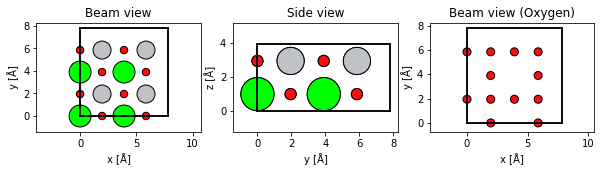

In [16]:
atoms = read('../data/srtio3_100.cif') * (2,2,1)
atoms.center(axis = 2)

from abtem import show_atoms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,2))

show_atoms(atoms, ax = ax1, title = 'Beam view')
show_atoms(atoms, ax = ax2, plane = 'yz', title = 'Side view')
show_atoms(atoms[atoms.numbers == 8], ax = ax3, plane = 'xy', title = 'Beam view (Oxygen)');


In [17]:
len(O_transitions)

3

In [18]:
transition_potential = TransitionPotential(O_transitions,
                                           atoms = atoms,
                                           sampling = .05,
                                           energy = 100e3,
                                           slice_thickness = 2)


In [19]:
transition_potential._calculate_potentials(0)

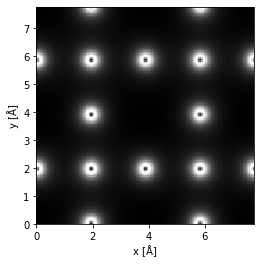

In [20]:
transition_potential.show()

In [21]:
S = SMatrix(energy = 100e3, semiangle_cutoff = 25) # interpolation not implemented!


detector = EELSDetector(collection_angle = 100, interpolation = 4)


potential = Potential(atoms, sampling = .05, slice_thickness = .5,
                      projection = 'infinite', parametrization = 'kirkland')


transition_potential = TransitionPotential(O_transitions)


scan = GridScan((0,0), potential.extent, sampling = .9*S.ctf.nyquist_sampling)


measurement = S.coreloss_scan(scan, detector, potential, transition_potential)

Forward multislice: 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]


In [22]:
print(potential.extent,.9*S.ctf.nyquist_sampling)

(7.81, 7.81) 0.33312929356137355


In [23]:
s_array=scan.get_positions()
s_array

array([[0.        , 0.        ],
       [0.        , 0.32541667],
       [0.        , 0.65083333],
       ...,
       [7.48458333, 6.83375   ],
       [7.48458333, 7.15916667],
       [7.48458333, 7.48458333]])

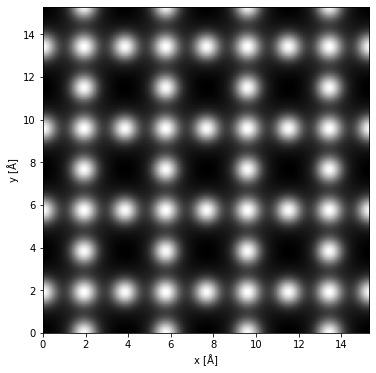

In [24]:
measurement.tile((2,2)).interpolate(.02).show(figsize = (6,6));

In [25]:
O_transitions = SubshellTransitions(Z = 8, n = 1, l = 0, xc = 'PBE')
Ti_transitions = SubshellTransitions(Z = 22, n = 2, l = 1, xc = 'PBE')
Sr_transitions = SubshellTransitions(Z = 38, n = 2, l = 1, xc = 'PBE')

transitions = [O_transitions, Ti_transitions, Sr_transitions]

transition_potential = TransitionPotential(transitions)

In [26]:
print('Oxygen:')
for bound_state, continuum_state in O_transitions.get_transition_quantum_numbers():
    print(f'(l, ml) = {bound_state} -> {continuum_state}')
print('Titanium:')
for bound_state, continuum_state in Ti_transitions.get_transition_quantum_numbers():
    print(f'(l, ml) = {bound_state} -> {continuum_state}')
print('Strontium:')
for bound_state, continuum_state in Sr_transitions.get_transition_quantum_numbers():
    print(f'(l, ml) = {bound_state} -> {continuum_state}')



Oxygen:
(l, ml) = (0, 0) -> (1, -1)
(l, ml) = (0, 0) -> (1, 0)
(l, ml) = (0, 0) -> (1, 1)
Titanium:
(l, ml) = (1, -1) -> (0, 0)
(l, ml) = (1, -1) -> (2, -2)
(l, ml) = (1, -1) -> (2, -1)
(l, ml) = (1, -1) -> (2, 0)
(l, ml) = (1, 0) -> (0, 0)
(l, ml) = (1, 0) -> (2, -1)
(l, ml) = (1, 0) -> (2, 0)
(l, ml) = (1, 0) -> (2, 1)
(l, ml) = (1, 1) -> (0, 0)
(l, ml) = (1, 1) -> (2, 0)
(l, ml) = (1, 1) -> (2, 1)
(l, ml) = (1, 1) -> (2, 2)
Strontium:
(l, ml) = (1, -1) -> (0, 0)
(l, ml) = (1, -1) -> (2, -2)
(l, ml) = (1, -1) -> (2, -1)
(l, ml) = (1, -1) -> (2, 0)
(l, ml) = (1, 0) -> (0, 0)
(l, ml) = (1, 0) -> (2, -1)
(l, ml) = (1, 0) -> (2, 0)
(l, ml) = (1, 0) -> (2, 1)
(l, ml) = (1, 1) -> (0, 0)
(l, ml) = (1, 1) -> (2, 0)
(l, ml) = (1, 1) -> (2, 1)
(l, ml) = (1, 1) -> (2, 2)


In [30]:
measurements = S.coreloss_scan(scan, detector, potential, transition_potential)

Forward multislice: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


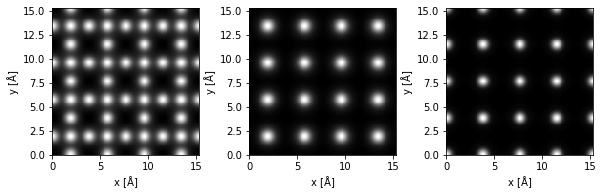

In [28]:
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize = (10,2.7))

measurements[0].tile((2, 2)).interpolate(.1).show(ax = ax1)
measurements[1].tile((2, 2)).interpolate(.1).show(ax = ax2)
measurements[2].tile((2, 2)).interpolate(.1).show(ax = ax3);

plt.savefig('low_res_eels.jpg', bbox_inches='tight')

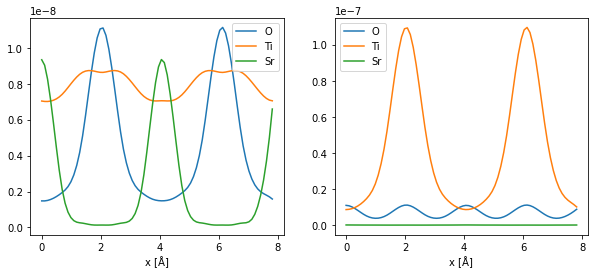

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))

measurements[0].interpolate_line((0,0), (0, potential.extent[1]),
                                 sampling = .1).show(ax = ax1, label = 'O')
measurements[1].interpolate_line((0,0), (0, potential.extent[1]),
                                 sampling = .1).show(ax = ax1, label = 'Ti')
measurements[2].interpolate_line((0,0), (0, potential.extent[1]),
                                 sampling = .1).show(ax = ax1, label = 'Sr')
ax1.legend()

measurements[0].interpolate_line((atoms[3].x, 0), (atoms[3].x,potential.extent[1]),
                                 sampling = .1).show(ax = ax2, label = 'O')
measurements[1].interpolate_line((atoms[3].x, 0),(atoms[3].x, potential.extent[1]),
                                 sampling = .1).show(ax = ax2, label = 'Ti')
measurements[2].interpolate_line((atoms[3].x, 0),(atoms[3].x,potential.extent[1]),
                                 sampling = .1).show(ax = ax2, label = 'Sr')
ax2.legend();